# Final Project : Analysis of Breast Cancer Wisconsin (Diagnostic)

## Introduction

Breast cancer is a significant health issue, and accurate diagnosis is crucial for effective treatment. In this final project, I will analyze the Breast Cancer Wisconsin (Diagnostic) dataset to explore the factors that influence the diagnosis of breast tumors. The objective is to use statistical analysis to answer questions surrounding this dataset and gain insights into breast cancer diagnosis.

The dataset contains various features related to cell nuclei characteristics, such as radius, texture, perimeter, and area, among others. These features are computed from digitized images of fine needle aspirates of breast masses. Additionally, the dataset includes an ID number and a diagnosis label indicating whether the tumor is malignant or benign.

Through statistical analysis, I will examine the relationships between these features and the corresponding diagnosis. The goal is to identify patterns, associations, and potential predictive factors that can help differentiate between malignant and benign tumors. By leveraging statistical techniques, we can uncover valuable insights that may contribute to the field of breast cancer research and aid in improving diagnostic accuracy.

Using the available statistical tools and methods, I will investigate the correlations, covariances, and distributions within the dataset. By understanding the statistical properties of the features, we can gain a deeper understanding of their impact on breast cancer diagnosis. This analysis has the potential to provide valuable information that can assist healthcare professionals in making informed decisions and improving patient outcomes.

Through this project, The aim to contribute to the knowledge surrounding breast cancer diagnosis by utilizing statistical analysis techniques. By uncovering insights and patterns within the dataset, we hope to enhance the understanding of breast cancer characteristics and facilitate the development of more effective diagnostic methods.

## About Dataset

The breast cancer wisconsin (diagnostic) dataset, sourced from Kaggle, provides valuable information about fine needle aspirate (FNA) images of breast masses. It consists of various features that describe the characteristics of cell nuclei present in the images. These features include radius mean, texture mean, perimeter mean, area mean, smoothness mean, compactness mean, concavity mean, concave points mean, symmetry mean, and fractal dimension mean. The dataset categorizes these features into mean, standard error, and worst values, resulting in a total of 30 features. Additionally, the dataset includes an ID number and a diagnosis label indicating whether the mass is malignant or benign.

With 357 benign cases and 212 malignant cases, this dataset offers significant insights into breast tissue characteristics. It has been meticulously prepared, with features recoded to ensure accuracy with four significant digits. The dataset is complete, with no missing attribute values, making it a reliable resource for a range of analytical and predictive purposes.

The dataset's 32 columns provide detailed information about various variables, such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. These variables offer valuable insights into the nature of breast tissue and can be instrumental in understanding and predicting breast cancer diagnoses.

Source: Kaggle Breast Cancer Wisconsin (Diagnostic) Dataset  
Link : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?datasetId=180

In [22]:
#Import the Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

data = pd.read_csv("C:/Users/bmurdyantoro/OneDrive - Zuellig Pharma Holdings Pte Ltd/Documents/Pacman Cource/data.csv")

In [2]:
# Filter the dataset to obtain the malignant and benign tumor data
malignant_data = data.loc[data['diagnosis'] == 'M'][['diagnosis', 'radius_mean']]
benign_data = data.loc[data['diagnosis'] == 'B'][['diagnosis', 'radius_mean']]

## Research Questions

###  Question 1 : What are the descriptive statistics for the radius mean values of malignant and benign tumors?

In this question, we will explore the descriptive statistics for both malignant and benign tumors. The statistics provide valuable insights into the distribution and characteristics of the radius mean values for each tumor type. The descriptive statistics include measures such as the mean, variance, standard deviation, and a comprehensive description of the data. Let's delve into the details:

In [3]:
#Statistic Descriptive
print("Descriptive Statistics for Radius Mean Malignant Tumors:")
print("Mean: {:.4f}".format(malignant_data.radius_mean.mean()))
print("Variance: {:.4f}".format(malignant_data.radius_mean.var()))
print("Standard Deviation: {:.4f}".format(malignant_data.radius_mean.std()))
print("Description: ")
print(malignant_data.radius_mean.describe())

print("\nDescriptive Statistics for Radius Mean Benign Tumors:")
print("Mean: {:.4f}".format(benign_data.radius_mean.mean()))
print("Variance: {:.4f}".format(benign_data.radius_mean.var()))
print("Standard Deviation: {:.4f}".format(benign_data.radius_mean.std()))
print("Description: ")
print(benign_data.radius_mean.describe())


Descriptive Statistics for Radius Mean Malignant Tumors:
Mean: 17.4628
Variance: 10.2654
Standard Deviation: 3.2040
Description: 
count    212.000000
mean      17.462830
std        3.203971
min       10.950000
25%       15.075000
50%       17.325000
75%       19.590000
max       28.110000
Name: radius_mean, dtype: float64

Descriptive Statistics for Radius Mean Benign Tumors:
Mean: 12.1465
Variance: 3.1702
Standard Deviation: 1.7805
Description: 
count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


From the result descriptive statistics of the radius mean values for malignant and benign tumors provide valuable insights into the characteristics and distribution of these tumor types. 
For malignant tumors, the mean radius mean value is 17.4628, with a variance of 10.2654 and a standard deviation of 3.2040. The data ranges from 10.9500 to 28.1100, with the majority falling within the interquartile range of 15.0750 to 19.5900.
On the other hand, benign tumors have a lower mean radius mean value of 12.1465, with a variance of 3.1702 and a standard deviation of 1.7805. The data ranges from 6.9810 to 17.8500, with the majority falling within the interquartile range of 11.0800 to 13.3700.
These statistics reveal the differences in the radius mean values between malignant and benign tumors. Malignant tumors tend to have larger radius mean values on average, with greater variability compared to benign tumors.
Overall, these descriptive statistics contribute to a better understanding of the characteristics and distribution of tumor types based on their radius mean values.

### Question 2 :  How do the most frequent radius mean values differ between malignant and benign tumors?

#### Distributuon of malignant and benign tumors

First, we explore the distribution of malignant and benign tumors using a bar plot. From the plot, it can be observed that there were 350 cases diagnosed as benign tumors and approximately 200 cases diagnosed as malignant tumors.

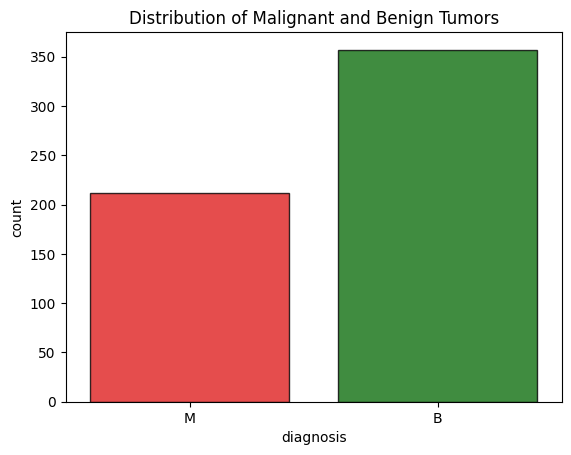

In [12]:
sns.countplot(x='diagnosis', data=data, palette=['red', 'green'], alpha=0.8, edgecolor='black')
plt.title('Distribution of Malignant and Benign Tumors')
plt.show()

#### Histogram in the radius mean of Malignant and Benign Tumors

The analysis aims to explore the dataset containing tumor diagnoses and corresponding radius mean values. By visualizing the data through histograms, we gain insights into the distribution of radius mean values for both malignant and benign tumors.

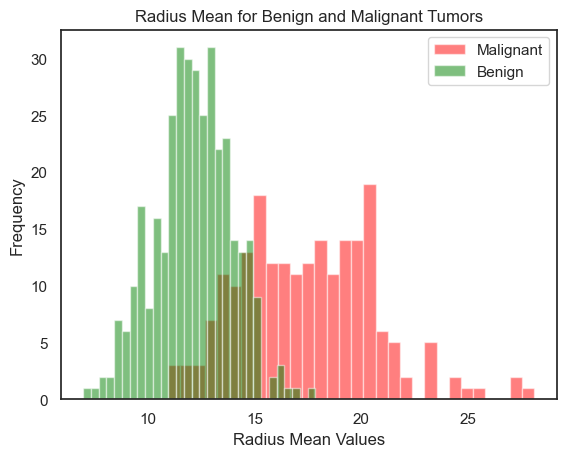

Most frequent malignant radius mean is: 20.1020
Most frequent benign radius mean is: 11.3286


In [30]:
# Plot histogram for malignant tumors
m_hist, m_bins, _ = plt.hist(malignant_data['radius_mean'], bins=30, color='red', alpha=0.5, label="Malignant")

# Plot histogram for benign tumors
b_hist, b_bins, _ = plt.hist(benign_data['radius_mean'], bins=30, color='green', alpha=0.5, label="Benign")

# Add labels, legend, and title to the plot
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Radius Mean for Benign and Malignant Tumors")
plt.show()

"""Find the bin with the highest frequency count in the histogram (m_hist)
and retrieve the corresponding bin value from the bin edges array (m_bins).
This bin value represents the most frequent malignant radius mean."""

# Find the index of the maximum value in the m_hist array. It identifies the bin with the highest frequency count.
m_most_freq_index = np.argmax(m_hist)
b_most_freq_index = np.argmax(b_hist)
# Retrieve the corresponding bin value from the m_bins array. It represents the most frequent malignant radius mean.
most_frequent_malignant_radius_mean = m_bins[m_most_freq_index]
most_frequent_benign_radius_mean = b_bins[b_most_freq_index]

print("Most frequent malignant radius mean is: {:.4f}".format(most_frequent_malignant_radius_mean))
print("Most frequent benign radius mean is: {:.4f}".format(most_frequent_benign_radius_mean))


From the histograms we can see, its provides several insights. Firstly, malignant tumors exhibit larger radius mean values compared to benign tumors, as observed from the graph. Secondly, the distribution of benign tumors follows a bell-shaped pattern, indicating a predictable and symmetrical distribution of radius mean values. Lastly, the analysis reveals that the most frequent radius mean for malignant tumors is 20.1020, while the most frequent radius mean for benign tumors is 11.3286.

#### The outliers in the radius mean values for both benign and malignant tumors

Upon observing the graph, it is noticed that there is an outlier in the benign distribution (green graph) and the malignant distribution (red graph). This outlier represents a rare event or a potential error in the radius mean values. To investigate this further, a box plot will be utilized to examine the details of the outlier in the benign & malignant distribution. The box plot will provide a comprehensive overview of any significant deviations from the overall pattern, enabling a deeper analysis of the outlier's impact on the data.  

To calculate outliers using the interquartile range (IQR) method, follow these simple steps:
1. Calculate the first quartile (Q1) and third quartile (Q3) of the data.
2. Compute the IQR by subtracting Q1 from Q3: IQR = Q3 - Q1.
3. Determine the lower outlier threshold by subtracting 1.5 times the IQR from Q1: Lower Threshold = Q1 - 1.5 * IQR.
4. Find the upper outlier threshold by adding 1.5 times the IQR to Q3: Upper Threshold = Q3 + 1.5 * IQR.
5. Identify any values in the dataset that fall below the lower threshold or above the upper threshold. These values are considered outliers.

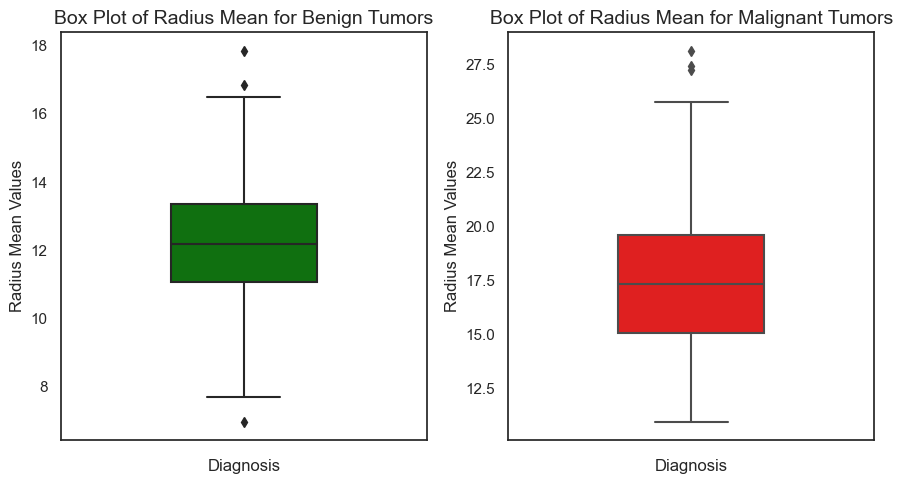

Outliers in Benign Tumors:  [ 6.981 16.84  17.85 ]
Outliers in Malignant Tumors:  [27.22 28.11 27.42]


In [44]:
# Set the size of the figure
plt.figure(figsize=(9, 5))

# Create subplots for benign and malignant tumors
plt.subplot(1, 2, 1)
sns.boxplot(y=benign_data['radius_mean'], color='green', width=0.4)
plt.title("Box Plot of Radius Mean for Benign Tumors", fontsize=14)
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel("Radius Mean Values", fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(y=malignant_data['radius_mean'], color='red', width=0.4)
plt.title("Box Plot of Radius Mean for Malignant Tumors", fontsize=14)
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel("Radius Mean Values", fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Calculate the quartiles and interquartile range (IQR) for the radius mean of benign tumors:
desc_benign = benign_data['radius_mean'].describe()
Q1_benign = desc_benign["25%"]
Q3_benign = desc_benign["75%"]
IQR_benign = Q3_benign - Q1_benign

# Determine the lower and upper bounds for outliers in benign tumors:
lower_bound_benign = Q1_benign - 1.5 * IQR_benign
upper_bound_benign = Q3_benign + 1.5 * IQR_benign

# Calculate the quartiles and interquartile range (IQR) for the radius mean of malignant tumors:
desc_malignant = malignant_data['radius_mean'].describe()
Q1_malignant = desc_malignant["25%"]
Q3_malignant = desc_malignant["75%"]
IQR_malignant = Q3_malignant - Q1_malignant

# Determine the lower and upper bounds for outliers in malignant tumors:
lower_bound_malignant = Q1_malignant - 1.5 * IQR_malignant
upper_bound_malignant = Q3_malignant + 1.5 * IQR_malignant

# Identify and display the outliers for benign tumors:
outliers_benign = benign_data[(benign_data.radius_mean < lower_bound_benign) | (benign_data.radius_mean > upper_bound_benign)].radius_mean.values
print("Outliers in Benign Tumors: ", outliers_benign)

# Identify and display the outliers for malignant tumors:
outliers_malignant = malignant_data[(malignant_data.radius_mean < lower_bound_malignant) | (malignant_data.radius_mean > upper_bound_malignant)].radius_mean.values
print("Outliers in Malignant Tumors: ", outliers_malignant)


Upon analyzing the box plot, we can observe the presence of outliers in both the benign and malignant tumor radius mean. For the benign tumors, there are three outliers detected with values of 6.981, 16.84, and 17.85. These data points deviate significantly from the majority of the benign tumor radius mean values.

In addition, the malignant tumor box plot also reveals the presence of outliers. There are three outliers detected in the malignant tumors with values of 27.22, 28.11, and 27.42. These outliers suggest significant variations in the malignant tumor radius mean.

Further analysis and investigation can be conducted to understand the nature and potential reasons behind these outliers in both the benign and malignant tumor radius mean. This could involve examining any potential data errors or conducting additional research to explore the factors contributing to these unusual observations.

#### Cumulative Distribution Function (CDF) in the radius mean for  both Benign and Malignant Tumor

The cumulative distribution function (CDF) is a powerful statistical tool that allows us to analyze the probability distribution of tumor radius mean values. In this analysis, we examine the CDF for both benign and malignant tumors to gain insights into the likelihood of observing certain radius mean values. By calculating the probabilities P(12 < X) for benign tumors and P(20 < X) for malignant tumors, we can assess the probability of the radius mean exceeding these respective thresholds.

P(12 < X) for Benign Tumors: 0.5350140056022409
P(20 < X) for Malignant Tumors: 0.2075471698113207


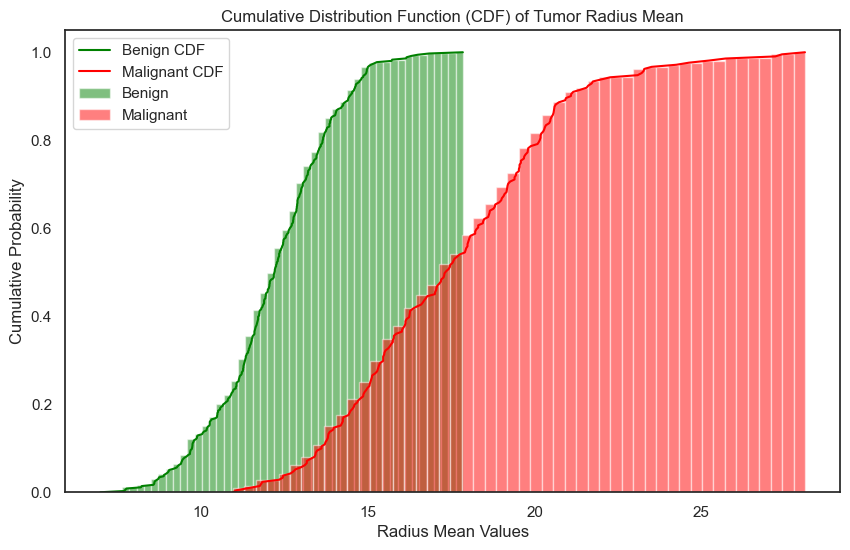

In [32]:
# Compute the CDF values for benign data
sorted_benign_data = np.sort(benign_data.radius_mean)
y_benign = np.arange(len(sorted_benign_data)) / float(len(sorted_benign_data) - 1)

# Compute the CDF values for malignant data
sorted_malignant_data = np.sort(malignant_data.radius_mean)
y_malignant = np.arange(len(sorted_malignant_data)) / float(len(sorted_malignant_data) - 1)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Calculate the cumulative probabilities for benign data
cumulative_probs_benign = np.arange(1, len(sorted_benign_data) + 1) / len(sorted_benign_data)
# Find the index of the first value greater than 12 for benign data
index_benign = np.argmax(sorted_benign_data > 12)
# Calculate the probability for benign data
probability_benign = 1 - cumulative_probs_benign[index_benign]

# Calculate the cumulative probabilities for malignant data
cumulative_probs_malignant = np.arange(1, len(sorted_malignant_data) + 1) / len(sorted_malignant_data)
# Find the index of the first value greater than 20 for malignant data
index_malignant = np.argmax(sorted_malignant_data > 20)
# Calculate the probability for malignant data
probability_malignant = 1 - cumulative_probs_malignant[index_malignant]

# Plot the CDF for benign data
plt.plot(sorted_benign_data, y_benign, color='green', label='Benign CDF')

# Plot the CDF for malignant data
plt.plot(sorted_malignant_data, y_malignant, color='red', label='Malignant CDF')

# Plot the histograms for benign and malignant data
plt.hist(benign_data.radius_mean, bins=50, color='green', alpha=0.5, label='Benign', density=True, cumulative=True, edgecolor='white')
plt.hist(malignant_data.radius_mean, bins=50, color='red', alpha=0.5, label='Malignant', density=True, cumulative=True, edgecolor='white')

# Set the title and labels
plt.title('Cumulative Distribution Function (CDF) of Tumor Radius Mean')
plt.xlabel('Radius Mean Values')
plt.ylabel('Cumulative Probability')

# Display the legend
plt.legend()

# Calculate and print P(12 < X) for benign and P(20 < X) for malignant data
print("P(12 < X) for Benign Tumors:", probability_benign)
print("P(20 < X) for Malignant Tumors:", probability_malignant)

# Show the plot
plt.show()


Upon analyzing the CDF graph for benign tumors, we find that the probability P(12 < X) is calculated to be approximately 0.535. This indicates that there is a 53.5% chance that the radius mean for a benign tumor is less than or equal to 12.
Similarly, for malignant tumors, the probability P(20 < X) is approximately 0.208. This suggests that there is a 20.8% chance that the radius mean for a malignant tumor is less than or equal to 20.

### Question 3 : What is the effect size between the radius mean values of malignant and benign tumors?

In this analysis, we focus on determining the effect size between the radius mean values of malignant and benign tumors. The effect size is a measure that quantifies the magnitude of the difference between these two groups, independent of sample size. By calculating the effect size, we can assess the practical significance of the differences observed in tumor radius mean values.

In [181]:
# Calculate the mean difference between malignant and benign tumor radius mean
mean_diff = malignant_data.radius_mean.mean() - benign_data.radius_mean.mean()

# Calculate the variances for benign and malignant tumor radius mean
var_bening = benign_data.radius_mean.var()
var_malignant = malignant_data.radius_mean.var()

# Calculate the pooled variance
var_pooled = (len(benign_data) * var_bening + len(malignant_data) * var_malignant) / float(len(benign_data) + len(malignant_data))

# Calculate the effect size
effect_size = mean_diff / np.sqrt(var_pooled)

# Print the effect size
print("Effect size:", effect_size)



Effect size: 2.2048585165041428


We utilized Cohen's effect size, which categorizes the magnitude of the effect as small (d = 0.2), medium (d = 0.5), or large (d = 0.8). The calculated effect size for the difference between malignant and benign tumor radius mean values is 2.2049. This large effect size, based on Cohen's classification (d = 0.8), indicates a substantial and meaningful difference between the two groups. It confirms that benign and malignant tumors exhibit distinct radius mean values, emphasizing the importance and relevance of the observed disparity in these tumor types.


### Question 4 : What is the nature and strength of the relationships for each variables in the dataset?

#### Relationships between the radius mean and area mean using Scatter Plots

The scatter plots show how the radius mean and area mean variables are related. We can visually observe how changes in one variable correspond to changes in the other. Additionally, the Pearson correlation coefficient summarizes the strength and direction of the linear relationship between the variables. A value of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation. By analyzing both the scatter plot and the correlation coefficient, we can gain insights into the nature and strength of the relationship between the radius mean and area mean variables.

<Figure size 800x600 with 0 Axes>

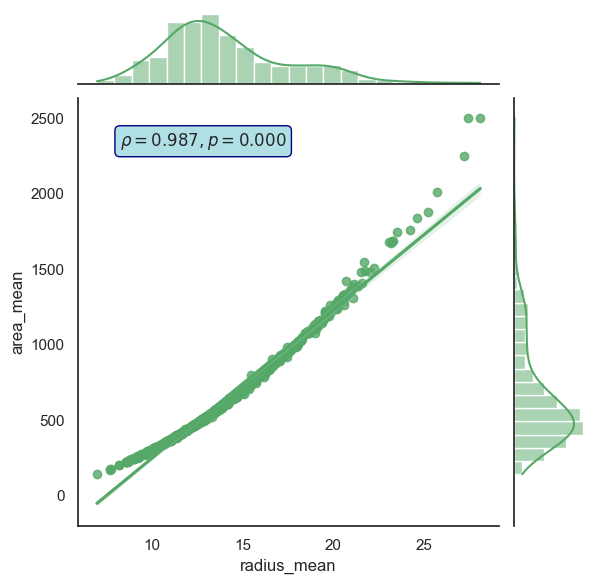

In [42]:
import scipy.stats as stats

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a joint plot with a regression line
jp = sns.jointplot(data.radius_mean, data.area_mean, kind="reg", color="g")

# Calculate the Pearson correlation coefficient
correlation, p_value = stats.pearsonr(data.radius_mean, data.area_mean)

# Annotate the plot with correlation coefficient and p-value
jp.ax_joint.annotate(f'$\\rho = {correlation:.3f}, p = {p_value:.3f}$',
                     xy=(0.1, 0.9), xycoords='axes fraction',
                     ha='left', va='center',
                     bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

# Display the plot
plt.show()

The scatter plot shows that as the radius mean increases, the area mean also tends to increase. This suggests a positive relationship between these variables. The high Pearson correlation coefficient of 0.99 confirms the strong positive correlation between the radius mean and area mean.

#### Relationships between the radius mean, area mean, and fractal dimension se with Pearson Correlation

Next analysis, we examine the relationships between three variables: Radius Mean, Area Mean, and Fractal Dimension SE. We use scatter plots to visualize these relationships and calculate the Pearson correlation coefficients to measure their strength.
By studying the scatter plots and correlation coefficients, we gain insights into the connections among "radius_mean", "area_mean", and "fractal_dimension_se" in the dataset.


Pearson correlation coefficient (radius_mean, area_mean): 0.9873571700566125
Pearson correlation coefficient (radius_mean, fractal_dimension_se): -0.042641269114456155
Pearson correlation coefficient (area_mean, fractal_dimension_se): -0.019886963235068014


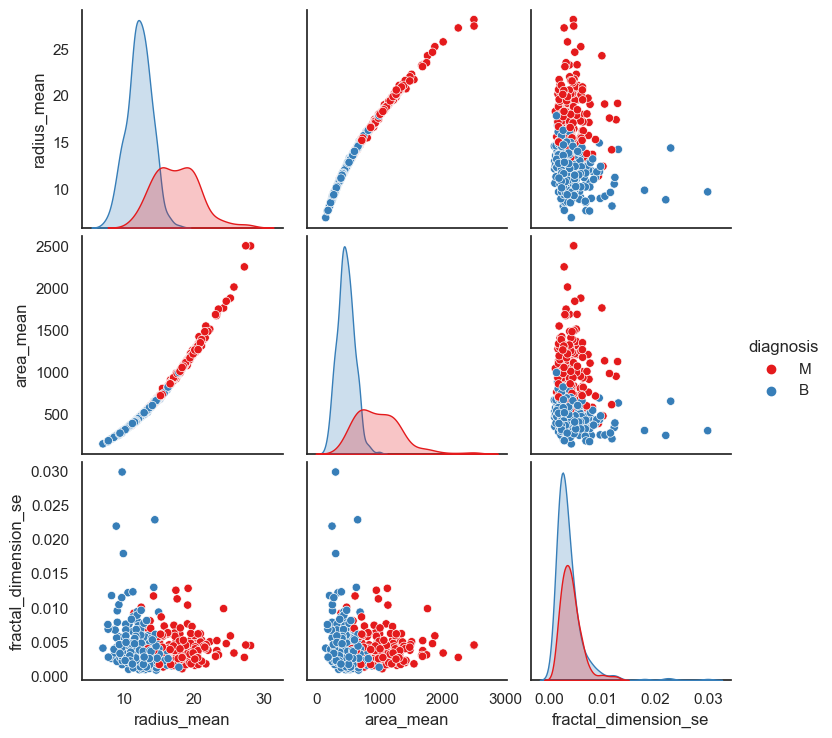

In [39]:
# Select the columns of interest
columns = ["diagnosis", "radius_mean", "area_mean", "fractal_dimension_se"]

# Create the pairplot
sns.pairplot(data[columns], kind ="scatter", hue="diagnosis", palette="Set1")

# Calculate the Pearson correlation coefficients
correlation_radius_area, _ = pearsonr(data.radius_mean, data.area_mean)
correlation_radius_fractal, _ = pearsonr(data.radius_mean, data.fractal_dimension_se)
correlation_area_fractal, _ = pearsonr(data.area_mean, data.fractal_dimension_se)

# Print the correlation coefficients
print("Pearson correlation coefficient (radius_mean, area_mean):", correlation_radius_area)
print("Pearson correlation coefficient (radius_mean, fractal_dimension_se):", correlation_radius_fractal)
print("Pearson correlation coefficient (area_mean, fractal_dimension_se):", correlation_area_fractal)

# Display the plots
plt.show()


In conclusion, the analysis reveals the following:
1. There is a strong positive correlation (Pearson correlation coefficient of 0.987) between the radius mean and area mean variables. This indicates that as the radius mean increases, the area mean tends to increase as well.

2. On the other hand, there is a very weak negative correlation (Pearson correlation coefficient of -0.043) between the radius mean and fractal dimension se variables. This suggests that changes in the radius mean have a minimal impact on the fractal dimension se.

3. Similarly, there is a very weak negative correlation (Pearson correlation coefficient of -0.020) between the area mean and fractal dimension se variables. This implies that variations in the area mean do not significantly influence the fractal dimension se.

Overall, the analysis highlights a strong relationship between the radius mean and area mean variables, while indicating little to no correlation between the area mean or fractal dimension se. These findings provide valuable insights into the relationships and interactions among these tumor characteristics.

#### Relationship between each variable using Correlation Heat Map

The correlation heatmap is a visual representation that allows us to quickly identify the relationships between variables in a dataset. By using colors to indicate the strength and direction of the correlations, we can easily spot patterns and trends in the data. This helps us understand which variables are closely related and guides further analysis. Let's generate the correlation heatmap and explore the connections within our dataset.

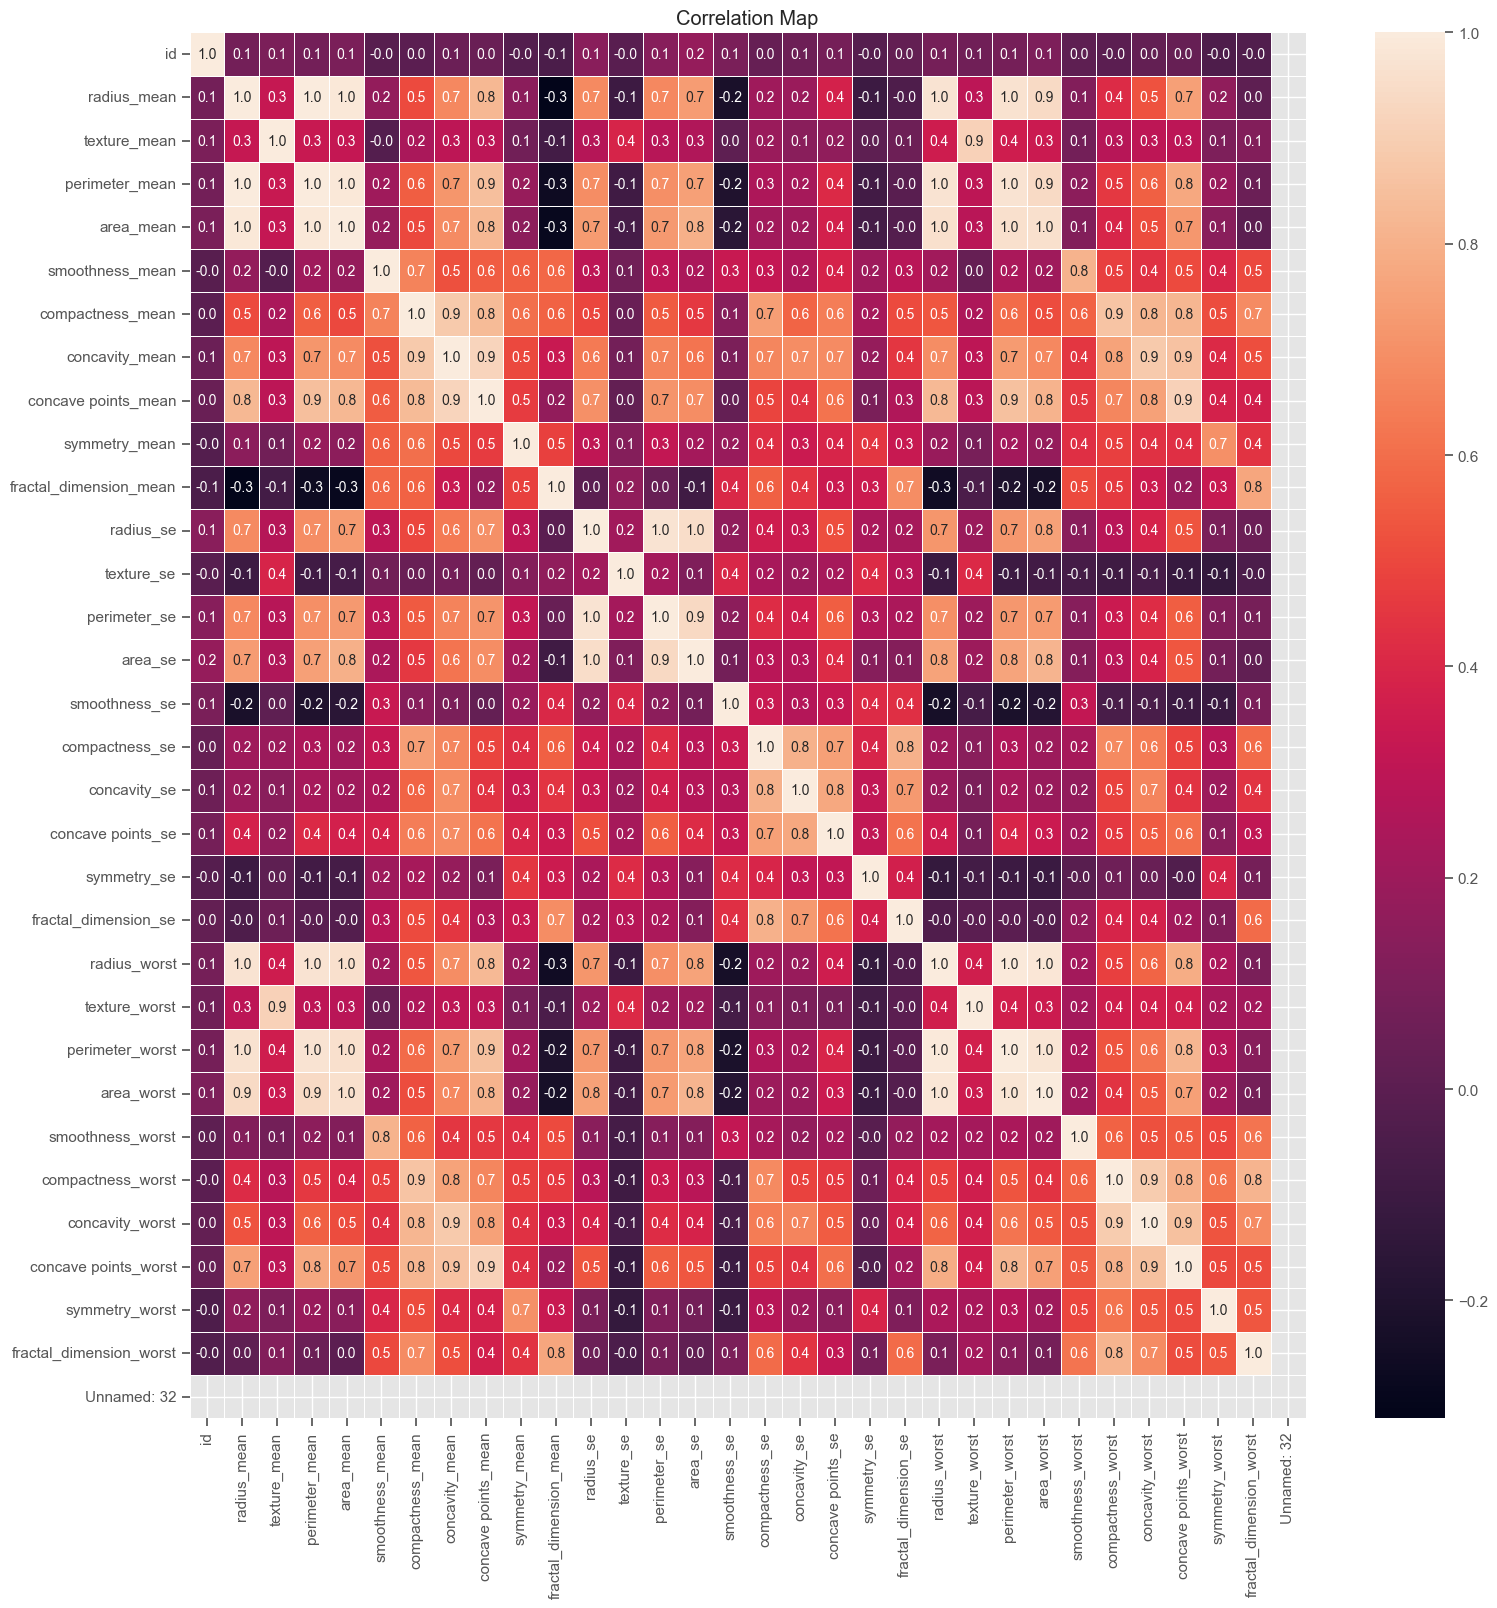

In [148]:
# Set the figure size
f,ax=plt.subplots(figsize = (18,18))
# Create a heatmap of the correlation matrix
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
# Rotate the x-axis labels
plt.xticks(rotation=90)
# Rotate the y-axis labels
plt.yticks(rotation=0)
# Set the title
plt.title('Correlation Map')
# Display the plot
plt.show()

From the heatmap, we can observe the strength of the relationship between different variables, which is represented by values ranging from -1 to 1. A value close to -1 indicates a negative correlation between two variables, such as the correlation between radius_mean and fractal_dimension_mean (-0.3), indicating a weak negative correlation. A value close to 0 suggests no correlation between two variables, as seen in the correlation between radius_mean and fractal_dimension_worst. On the other hand, a value close to 1 indicates a positive correlation between two variables, like the correlation between radius_mean and area_mean, indicating a strong positive correlation.

#### Realationship between radius mean, area mean and fractal dimension se using Covariance

On this analysis is to calculate and explore the covariance between different variables in the dataset.
In this analysis, we explore the covariance between different variables in the dataset. Covariance measures the relationship and dependency between variables, indicating how they vary together.
We focus on calculating the covariance between the "radius mean" and "area mean" variables, as well as between the "radius mean" and "fractal dimension se" variables. Positive covariance suggests that variables tend to increase or decrease together, while negative covariance indicates an inverse relationship.

In [149]:
covariance_radius_area = np.cov(data.radius_mean, data.area_mean)[0, 1]
covariance_radius_fractal = np.cov(data.radius_mean, data.fractal_dimension_se)[0, 1]

print("Covariance between radius mean and area mean:", covariance_radius_area)
print("Covariance between radius mean and fractal dimension se:", covariance_radius_fractal)

Covariance between radius mean and area mean: 1224.483409346457
Covariance between radius mean and fractal dimension se: -0.000397624857644063


The covariance between the "radius mean" and "area mean" variables is 1224.4834. This positive covariance suggests a strong positive relationship between these variables. As the radius mean increases, we can expect the area mean to also increase, indicating a positive association between tumor size and area.

On the other hand, the covariance between the "radius mean" and "fractal dimension se" variables is -0.0004. This small negative covariance implies a weak negative relationship between these variables. It indicates that as the radius mean increases, there is a slight tendency for the fractal dimension standard error to decrease, suggesting a weak inverse association.

Covariance provides valuable insights into the relationship and dependency between variables. However, it is important to note that covariance alone does not provide information about the strength or directionality of the relationship. Therefore, it is often useful to consider other statistical measures such as correlation coefficients to gain a more comprehensive understanding of the associations between variables.

### Question 5 :  Is there a statistically significant relationship between the 'radius mean' and 'area mean' variables in the tumor population?

#### Classic Hypothesis Testing

In classical hypothesis testing, we aim to assess the probability of observing a particular effect by chance alone. This involves several steps, including quantifying the size of the apparent effect, defining null and alternative hypotheses, and calculating the p-value.

The first step is to choose a suitable test statistic that quantifies the size of the apparent effect. In this analysis, we consider the difference in means between two groups, specifically the "radius mean" and "area mean" variables.

The second step involves defining the null hypothesis, which assumes that there is no statistical significance or relationship between the variables. The null hypothesis suggests that any observed effect is simply due to random chance. On the other hand, the alternative hypothesis proposes that there is a significant relationship or effect.

In [153]:
statistic, p_value = stats.ttest_rel(data['radius_mean'], data['area_mean'])
print('T-Test Result:')
print('Statistic:', statistic)
print('P-Value:', p_value)


T-Test Result:
Statistic: -43.86628729895275
P-Value: 1.5253492492559045e-184


In our analysis, the null hypothesis states that there is no relationship between the "radius mean" and "area mean" variables in the tumor population. Our goal is to refute this null hypothesis and demonstrate that there is indeed a relationship between these variables.

To assess the validity of the null hypothesis, we calculate the p-value, which represents the probability of observing the apparent effect if the null hypothesis were true. If the p-value is below a predetermined threshold (usually 0.05 or 0.01), we reject the null hypothesis.

In our specific example, the calculated p-value is 1.5253492492559045e-184, an extremely small value close to zero. This indicates that the observed effect between the "radius mean" and "area mean" variables is highly unlikely to occur by chance alone. Therefore, we can confidently reject the null hypothesis and conclude that there is a statistically significant relationship between the "radius mean" and "area mean" in the tumor population.

By rejecting the null hypothesis, we provide evidence supporting the alternative hypothesis that there is a meaningful and substantial relationship between these variables. This analysis strengthens our understanding of the connection between tumor characteristics and provides valuable insights for further research and analysis.